In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:

df = pd.read_csv("data-export (1) .csv")



In [12]:

df.head()


,# ----------------------------------------,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Session primary channel group (Default channel...,Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
1,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
2,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
3,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
4,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044


In [14]:
df.columns = df.iloc[0]
df.head()

,Session primary channel group (Default channel group),Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
0,Session primary channel group (Default channel...,Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
1,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
2,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
3,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
4,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044


In [26]:

df.columns = df.iloc[0]
df.drop(index = 0).reset_index(drop = True)
df.columns = ["channel group","DateHour","Users","Session","Engaged sessions","Average engagement time per session","Engaged sessions per user","Events per session	","Engagement rate","Event count"]

In [27]:

df.head()

,channel group,DateHour,Users,Session,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session\t,Engagement rate,Event count
0,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
1,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
2,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
3,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044
4,Organic Social,2024041720,175,221,112,46.918552036199100,0.64,4.529411764705880,0.5067873303167420,1001


In [28]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   channel group                        3182 non-null   object
 1   DateHour                             3182 non-null   object
 2   Users                                3182 non-null   object
 3   Session                              3182 non-null   object
 4   Engaged sessions                     3182 non-null   object
 5   Average engagement time per session  3182 non-null   object
 6   Engaged sessions per user            3182 non-null   object
 7   Events per session	                  3182 non-null   object
 8   Engagement rate                      3182 non-null   object
 9   Event count                          3182 non-null   object
dtypes: object(10)
memory usage: 248.7+ KB


cleaning dataset

In [29]:
df.head()

,channel group,DateHour,Users,Session,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session\t,Engagement rate,Event count
0,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
1,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
2,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
3,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044
4,Organic Social,2024041720,175,221,112,46.918552036199100,0.64,4.529411764705880,0.5067873303167420,1001


In [30]:
df["DateHour"] =pd.to_datetime(df["DateHour"], format="%y%m%d%H",errors='coerce')


In [31]:
numeric_cols = df.columns.drop(["channel group", "DateHour"])
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')
df["Hour"] = df["DateHour"].dt.hour




In [32]:

df.head()


,channel group,DateHour,Users,Session,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session\t,Engagement rate,Event count,Hour
0,Direct,NaT,237,300,144,47.526667,0.607595,4.673333,0.480000,1402,NaN
1,Organic Social,NaT,208,267,132,32.097378,0.634615,4.295880,0.494382,1147,NaN
2,Direct,NaT,188,233,115,39.939914,0.611702,4.587983,0.493562,1069,NaN
3,Organic Social,NaT,187,256,125,32.160156,0.668449,4.078125,0.488281,1044,NaN
4,Organic Social,NaT,175,221,112,46.918552,0.640000,4.529412,0.506787,1001,NaN


In [33]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   channel group                        3182 non-null   object        
 1   DateHour                             0 non-null      datetime64[ns]
 2   Users                                3182 non-null   int64         
 3   Session                              3182 non-null   int64         
 4   Engaged sessions                     3182 non-null   int64         
 5   Average engagement time per session  3182 non-null   float64       
 6   Engaged sessions per user            3182 non-null   float64       
 7   Events per session	                  3182 non-null   float64       
 8   Engagement rate                      3182 non-null   float64       
 9   Event count                          3182 non-null   int64         
 10  Hour        

In [34]:
df.describe()

,DateHour,Users,Session,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session\t,Engagement rate,Event count,Hour
count,0,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,0.0
mean,NaT,41.935889,51.192646,28.325581,66.644581,0.606450,4.675969,0.503396,242.272470,NaN
min,NaT,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,NaN
25%,NaT,20.000000,24.000000,13.000000,32.103034,0.561404,3.750000,0.442902,103.000000,NaN
50%,NaT,42.000000,51.000000,27.000000,49.020202,0.666667,4.410256,0.545455,226.000000,NaN
75%,NaT,60.000000,71.000000,41.000000,71.487069,0.750000,5.217690,0.633333,339.000000,NaN
max,NaT,237.000000,300.000000,144.000000,4525.000000,2.000000,56.000000,1.000000,1402.000000,NaN
std,NaN,29.582258,36.919962,20.650569,127.200659,0.264023,2.795228,0.228206,184.440313,NaN


In [43]:


sns.set(style="whitegrid")



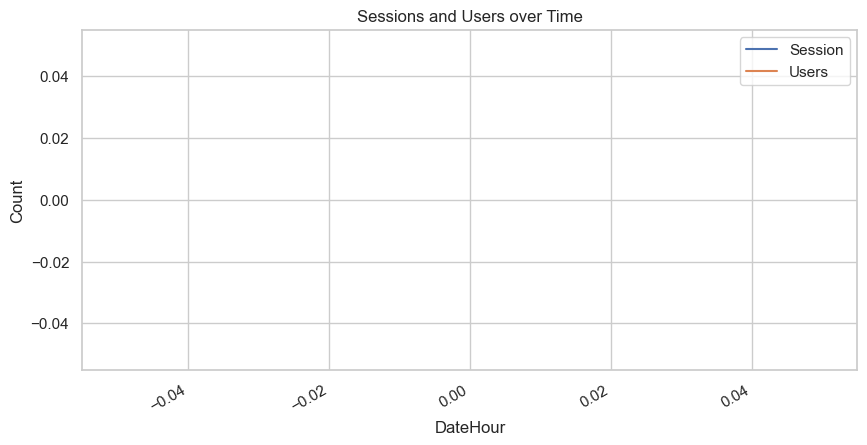

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# clean column names
df.columns = df.columns.str.strip()

# ensure DateHour is datetime
df["DateHour"] = pd.to_datetime(df["DateHour"])

# handle Session / Sessions column automatically
session_col = "Sessions" if "Sessions" in df.columns else "Session"

sns.set(style="whitegrid")
plt.figure(figsize=(10,5))

df.groupby("DateHour")[[session_col, "Users"]].sum().plot(ax=plt.gca())

plt.title("Sessions and Users over Time")
plt.xlabel("DateHour")
plt.ylabel("Count")
plt.show()



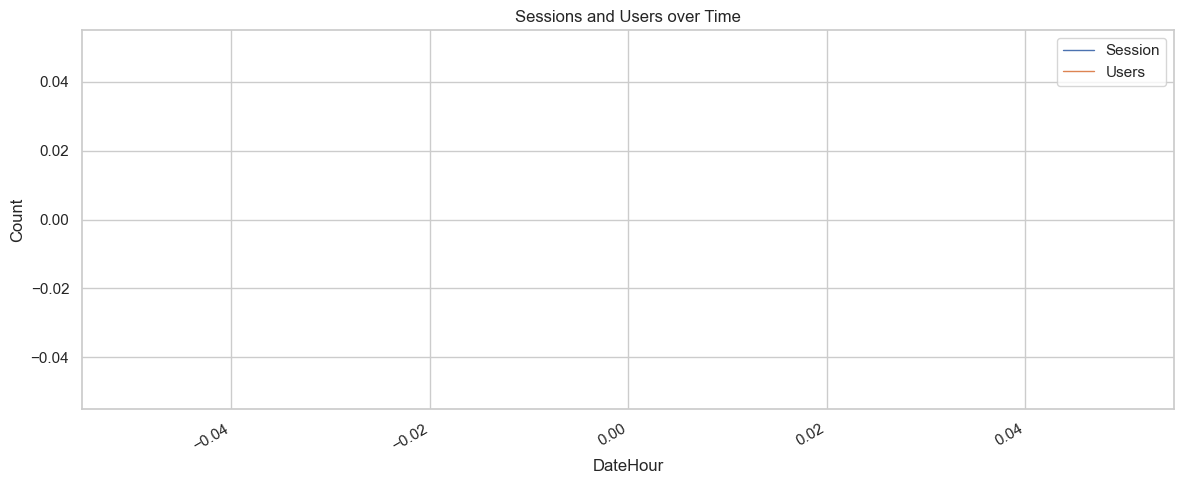

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# clean column names
df.columns = df.columns.str.strip()

# convert DateHour to datetime
df["DateHour"] = pd.to_datetime(df["DateHour"])

# sort by time (VERY IMPORTANT)
df = df.sort_values("DateHour")

# make sure numeric
df["Users"] = pd.to_numeric(df["Users"], errors="coerce")
df["Session"] = pd.to_numeric(df["Session"], errors="coerce")

sns.set(style="whitegrid")
plt.figure(figsize=(12,5))

df.groupby("DateHour")[["Session", "Users"]].sum().plot(
    ax=plt.gca(),
    linewidth=1
)

plt.title("Sessions and Users over Time")
plt.xlabel("DateHour")
plt.ylabel("Count")
plt.legend()
plt.tight_layout()
plt.show()



In [51]:
print(df.columns)


Index(['channel group', 'DateHour', 'Users', 'Session', 'Engaged sessions',
       'Average engagement time per session', 'Engaged sessions per user',
       'Events per session', 'Engagement rate', 'Event count', 'Hour'],
      dtype='object')


In [54]:
print(df.head())


    channel group DateHour  Users  Session  Engaged sessions  \
0          Direct      NaT    237      300               144   
1  Organic Social      NaT    208      267               132   
2          Direct      NaT    188      233               115   
3  Organic Social      NaT    187      256               125   
4  Organic Social      NaT    175      221               112   

   Average engagement time per session  Engaged sessions per user  \
0                            47.526667                   0.607595   
1                            32.097378                   0.634615   
2                            39.939914                   0.611702   
3                            32.160156                   0.668449   
4                            46.918552                   0.640000   

   Events per session  Engagement rate  Event count  Hour  
0            4.673333         0.480000         1402   NaN  
1            4.295880         0.494382         1147   NaN  
2            4.58798

In [55]:
print(df["DateHour"].dtype)


datetime64[ns]


In [56]:
print(df.columns)


Index(['channel group', 'DateHour', 'Users', 'Session', 'Engaged sessions',
       'Average engagement time per session', 'Engaged sessions per user',
       'Events per session', 'Engagement rate', 'Event count', 'Hour'],
      dtype='object')


In [63]:

sns.set(style="whitegrid")

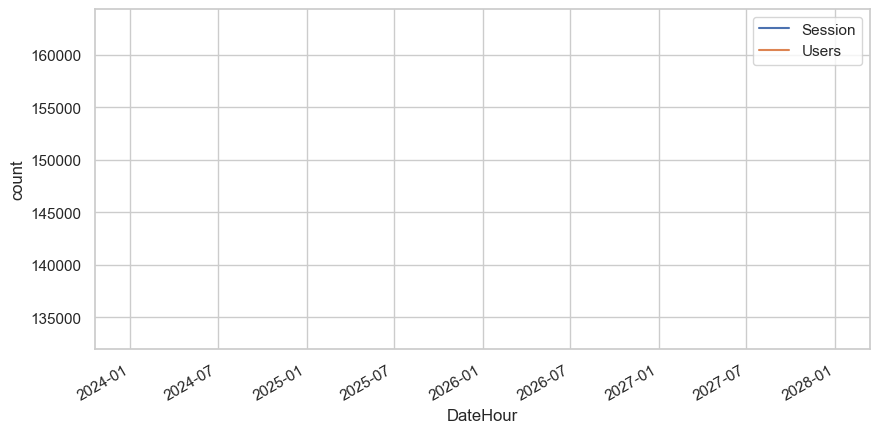

In [66]:
plt.figure(figsize=(10,5))
df.groupby("DateHour")[["Session","Users"]].sum().plot(ax=plt.gca())
plt.xlabel("DateHour")
plt.ylabel("count")
plt.show()

C:\Users\PALLAVI\AppData\Local\Temp\ipykernel_5256\1721610172.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\PALLAVI\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.



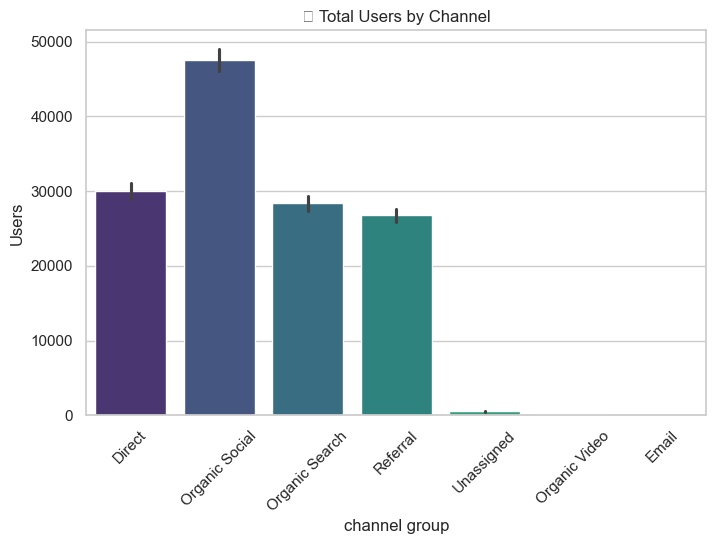

In [67]:
plt.figure(figsize=(8, 5))

sns.barplot(data=df, x="channel group", y="Users", estimator=np.sum, palette="viridis")

plt.title("📊 Total Users by Channel")
plt.xticks(rotation=45)
plt.show()


In [68]:
df.head()

,channel group,Users,Session,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count,Hour
DateHour,,,,,,,,,,
2025-12-31,Direct,237,300,144,47.526667,0.607595,4.673333,0.480000,1402,0
2025-12-31,Organic Social,208,267,132,32.097378,0.634615,4.295880,0.494382,1147,0
2025-12-31,Direct,188,233,115,39.939914,0.611702,4.587983,0.493562,1069,0
2025-12-31,Organic Social,187,256,125,32.160156,0.668449,4.078125,0.488281,1044,0
2025-12-31,Organic Social,175,221,112,46.918552,0.640000,4.529412,0.506787,1001,0


C:\Users\PALLAVI\AppData\Local\Temp\ipykernel_5256\1942835907.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




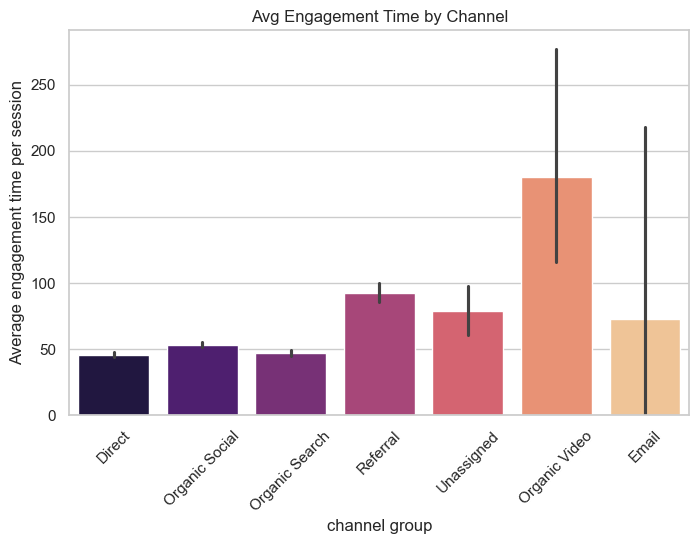

In [69]:

plt.figure(figsize=(8, 5))

sns.barplot(
    data=df,
    x="channel group",
    y="Average engagement time per session",
    estimator=np.mean,
    palette="magma"
)

plt.title("Avg Engagement Time by Channel")
plt.xticks(rotation=45)
plt.show()


In [70]:
df.head()

,channel group,Users,Session,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count,Hour
DateHour,,,,,,,,,,
2025-12-31,Direct,237,300,144,47.526667,0.607595,4.673333,0.480000,1402,0
2025-12-31,Organic Social,208,267,132,32.097378,0.634615,4.295880,0.494382,1147,0
2025-12-31,Direct,188,233,115,39.939914,0.611702,4.587983,0.493562,1069,0
2025-12-31,Organic Social,187,256,125,32.160156,0.668449,4.078125,0.488281,1044,0
2025-12-31,Organic Social,175,221,112,46.918552,0.640000,4.529412,0.506787,1001,0


C:\Users\PALLAVI\AppData\Local\Temp\ipykernel_5256\1560048786.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




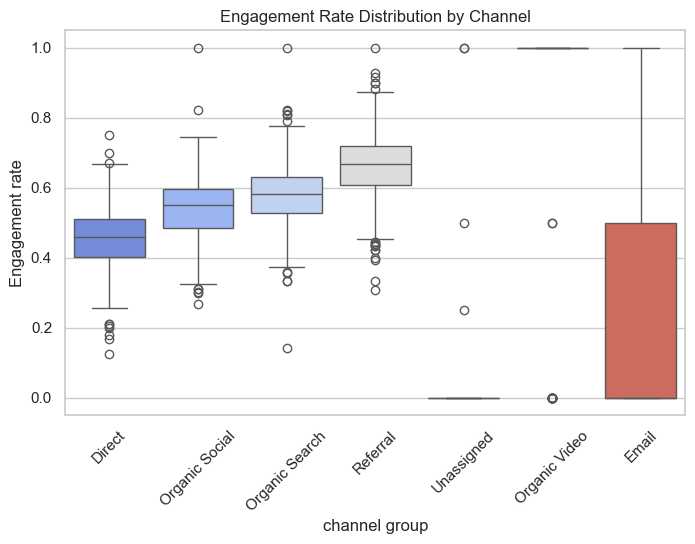

In [72]:


# Set figure size
plt.figure(figsize=(8, 5))

# Boxplot
sns.boxplot(
    data=df,
    x="channel group",
    y="Engagement rate",
    palette="coolwarm"
)

# Title and formatting
plt.title("Engagement Rate Distribution by Channel")
plt.xticks(rotation=45)

# Show plot
plt.show()


C:\Users\PALLAVI\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.



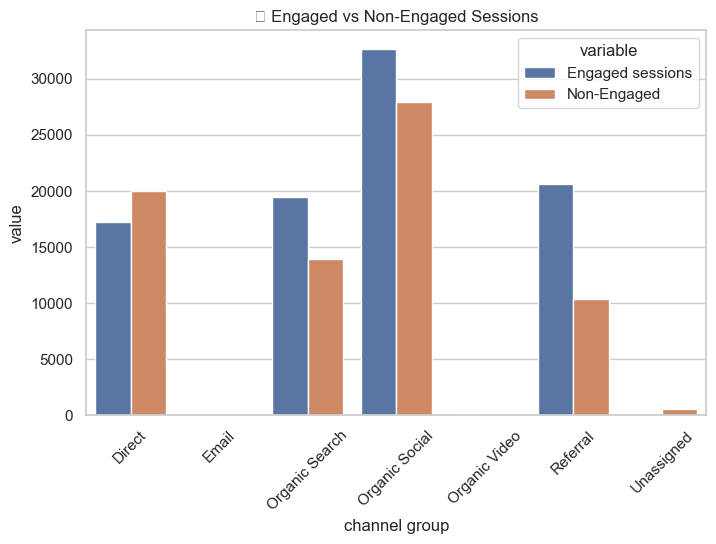

In [76]:

session_df = df.groupby("channel group")[["Session", "Engaged sessions"]].sum().reset_index()

session_df["Non-Engaged"] = session_df["Session"] - session_df["Engaged sessions"]

session_df_melted = session_df.melt(
    id_vars="channel group",
    value_vars=["Engaged sessions", "Non-Engaged"]
)

plt.figure(figsize=(8, 5))
sns.barplot(
    data=session_df_melted,
    x="channel group",
    y="value",
    hue="variable"
)

plt.title("📊 Engaged vs Non-Engaged Sessions")
plt.xticks(rotation=45)
plt.show()

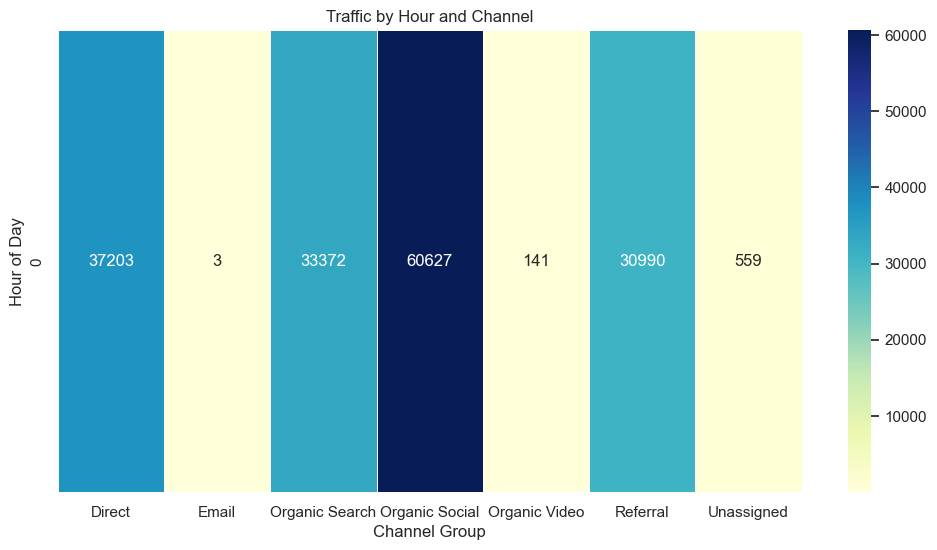

In [77]:
heatmap_data = df.groupby(["Hour", "channel group"])["Session"].sum().unstack().fillna(0)

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap="YlGnBu", linewidths=.5, annot=True, fmt=".0f")
plt.title("Traffic by Hour and Channel")
plt.xlabel("Channel Group")
plt.ylabel("Hour of Day")
plt.show()


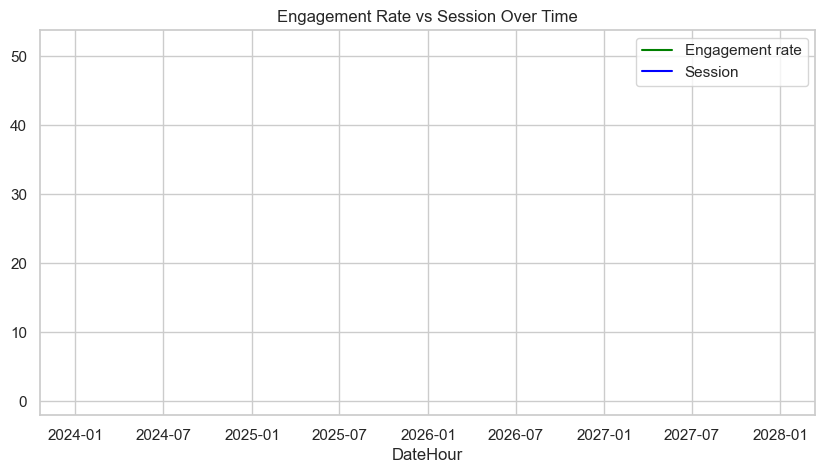

In [79]:
df_plot = df.groupby("DateHour")[["Engagement rate", "Session"]].mean().reset_index()

plt.figure(figsize=(10, 5))
plt.plot(df_plot["DateHour"], df_plot["Engagement rate"], label="Engagement rate", color="green")
plt.plot(df_plot["DateHour"], df_plot["Session"], label="Session", color="blue")
plt.title("Engagement Rate vs Session Over Time")
plt.xlabel("DateHour")
plt.legend()
